# Predictive Analysis

## Business Understanding

Proyek ini bertujuan untuk memprediksi harga diamonds di pasar berdasarkan karakteristik tertentu, sehingga perusahaan dapat menentukan harga beli yang pantas untuk memaksimalkan keuntungan. Berbeda dengan emas yang memiliki acuan harga global, harga diamonds dipengaruhi oleh fitur khusus seperti: Karat, Ukuran, Bentuk potongan, Warna, Tingkat kejernihan. Dengan memprediksi harga diamonds, perusahaan dapat menentukan harga beli yang optimal dan memastikan profit.

## Objectives
1. Mengetahui fitur yang paling berkorelasi dengan harga diamonds.
2. Membuat model machine learning yang dapat memprediksi harga diamonds seakurat mungkin berdasarkan fitur-fitur yang ada.

## Dataset

Pada project ini kita akan menggunakan [Diamonds Dataset](https://ggplot2.tidyverse.org/reference/diamonds.html#ref-usage) yang dapat diunduh [di sini](https://github.com/tidyverse/ggplot2/raw/main/data-raw/diamonds.csv). Dataset ini berisi data harga dan atribut lainnya dari hampir 54,000 diamond. Dataset ini dalam format data frame dengan 53,940 baris dan 10 variabel:
- price     : Harga dalam dolar AS ($326--$18,823)
- carat     : Berat diamond (0.2--5.01)
- cut       : Kualitas potongan (Fair, Good, Very Good, Premium, Ideal)
- color     : Warna diamond, dari D (terbaik) hingga J (terburuk)
- clarity   : Ukuran kejernihan diamond (I1 (terburuk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
- x         : Panjang dalam mm (0--10.74)
- y         : Lebar dalam mm (0--58.9)
- z         : Kedalaman dalam mm (0--31.8)
- depth     : Persentase kedalaman total = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table     : Lebar atas diamond relatif terhadap titik terluasnya (43--95)

## Import Library

In [126]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings

## Load Dataset

In [47]:
# url = "https://github.com/tidyverse/ggplot2/raw/main/data-raw/diamonds.csv"
# response = requests.get(url)
# file_name = "diamonds.csv"

# # Simpan file CSV
# with open(file_name, "wb") as file:
#     file.write(response.content)

# print(f"File '{file_name}' berhasil diunduh!")

In [48]:
diamonds = pd.read_csv('..\data\diamonds.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Exploratory Data Analysis

Deskripsi singkat

In [49]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [50]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Handling Missing Value

Dari hasil fungsi describe(), nilai minimum untuk kolom x, y, dan z adalah 0. Seperti kita tahu, x, y, dan z adalah ukuran panjang, lebar, dan kedalaman diamonds sehingga tidak mungkin ada diamonds dengan dimensi x, y, atau z bernilai 0. Kita patut menduga bahwa ini merupakan data yang tidak valid.

In [51]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()
 
print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [52]:
diamonds = diamonds.loc[(diamonds.x != 0) & (diamonds.y != 0) & (diamonds.z != 0)]

In [53]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Handling Outliers

**Checking numerical columns outliers**

In [54]:
num_cols = [column for column in diamonds.columns if diamonds[column].dtype in ['int64', 'float64']]
len(num_cols)

7

In [55]:
rows = 4
cols = 2

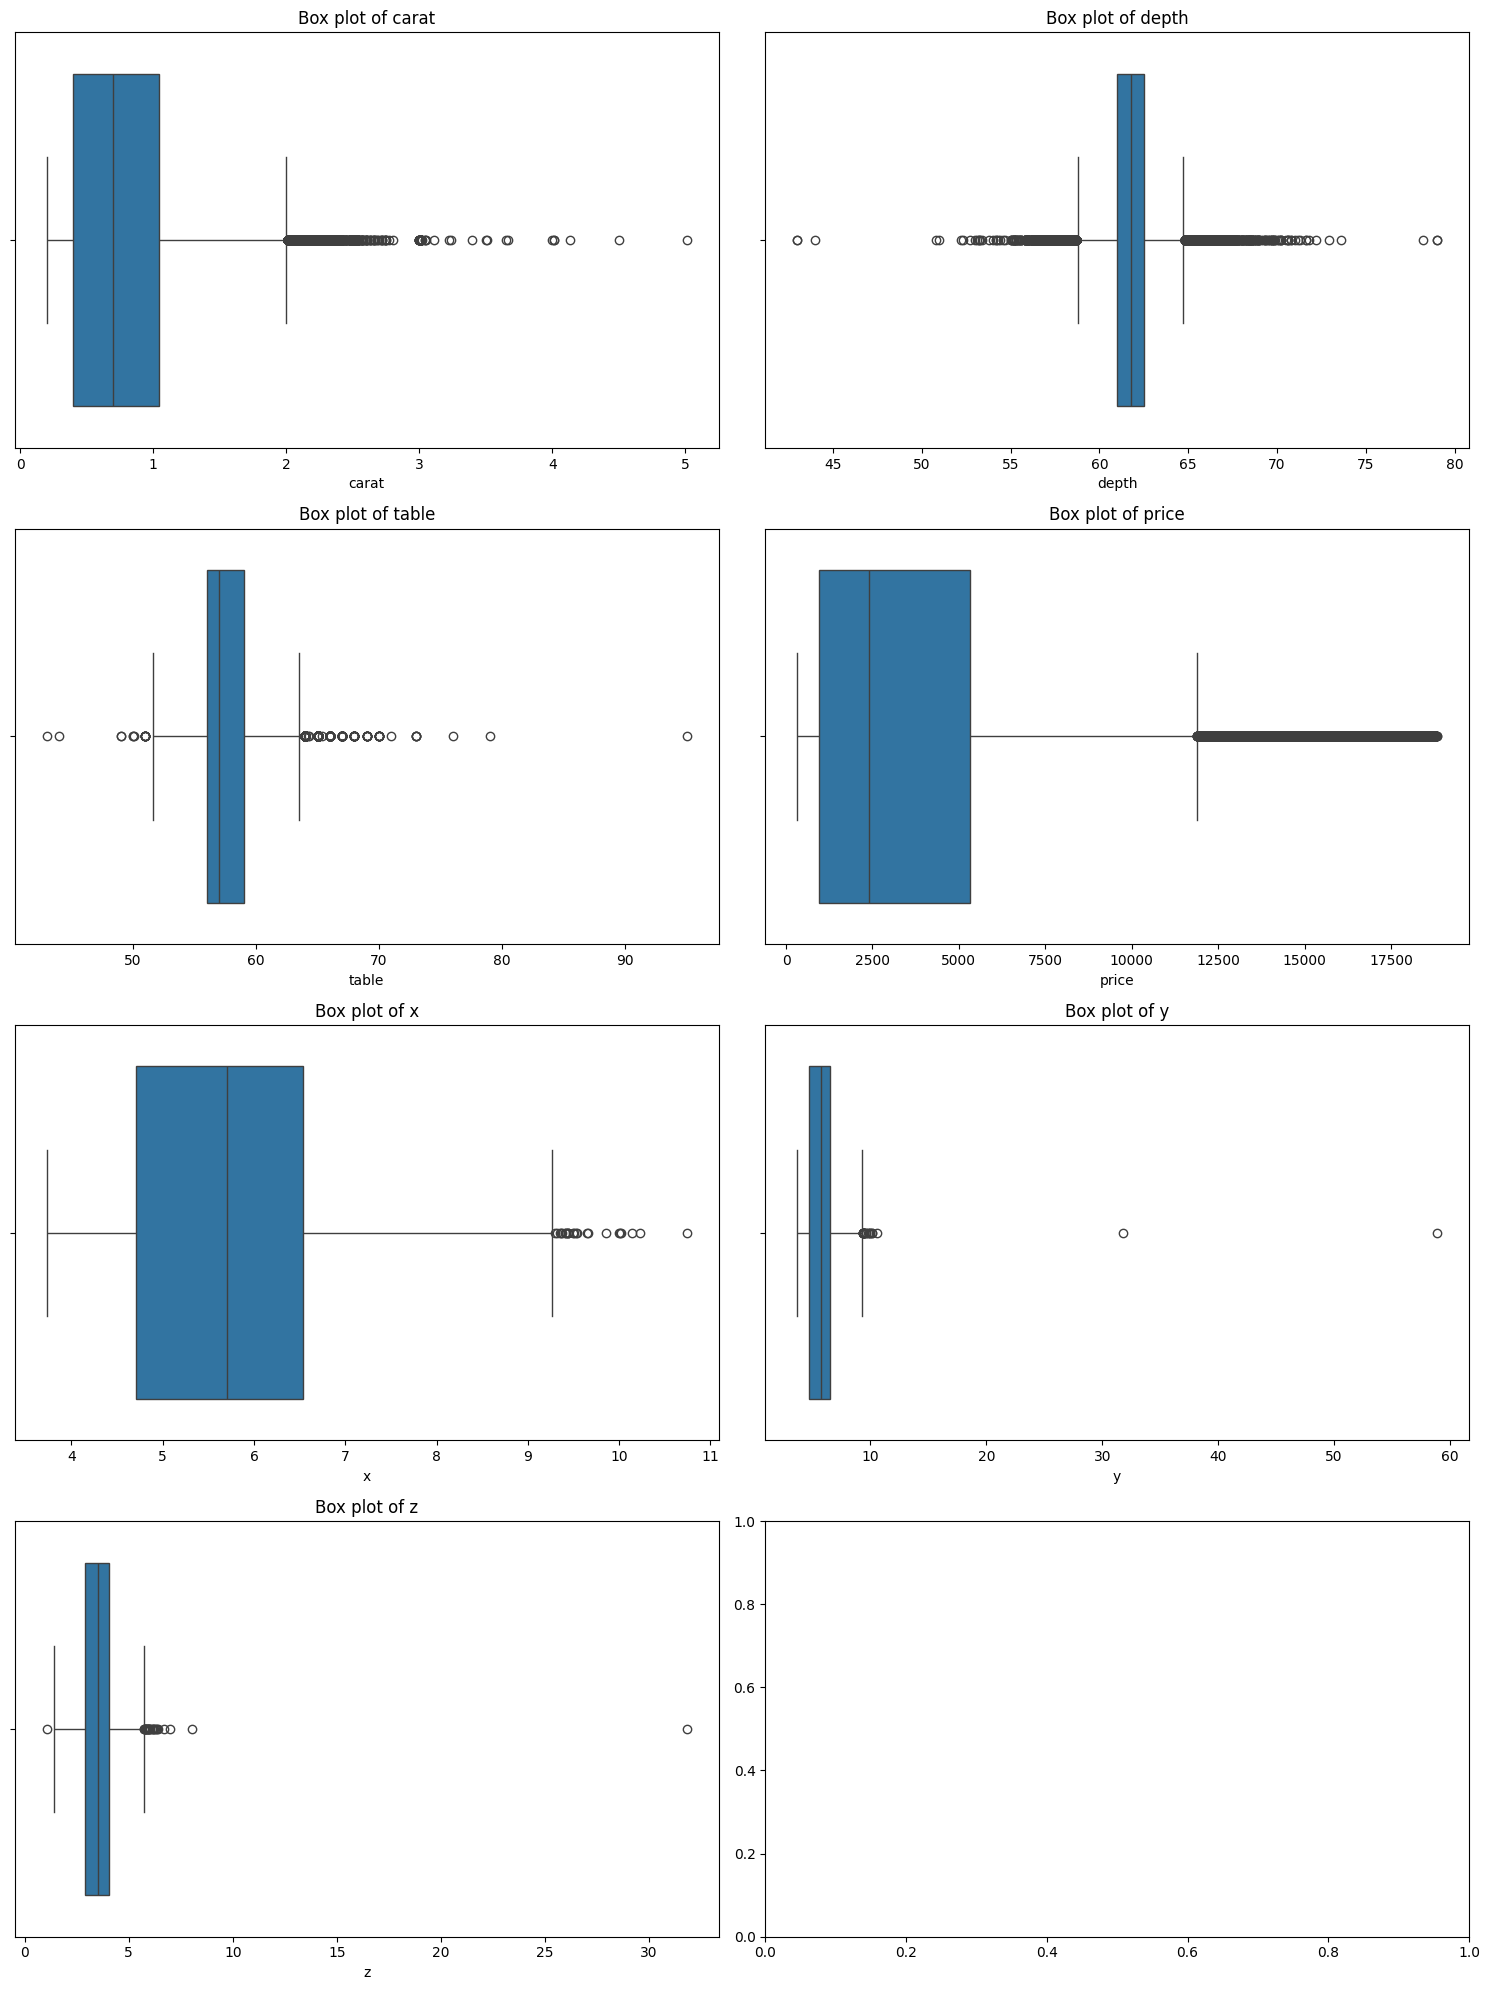

In [56]:
index = 0
fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.flatten()
for row in range(rows):
    for col in range(cols):
        if index >= num_cols_count:  # Limit to 7 subplots
            break
        # Create box plot subplot
        plt.subplot(rows, cols, index + 1)
        sns.boxplot(x=diamonds[num_cols[index]])
        plt.title(f'Box plot of {num_cols[index]}')
        plt.xlabel(num_cols[index])
        
        index +=1 
        
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Berdasarkan boxplot pada fitur numerik, tampak beberapa fitur memiliki outliers yang harus ditangani.

In [58]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
diamonds.shape

C:\Users\Jals\AppData\Local\Temp\ipykernel_21856\4173935945.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
C:\Users\Jals\AppData\Local\Temp\ipykernel_21856\4173935945.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
C:\Users\Jals\AppData\Local\Temp\ipykernel_21856\4173935945.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1

(47524, 10)

### Univariate Analysis

In [59]:
num_cols

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [61]:
categorical_cols = [column for column in diamonds.columns if diamonds[column].dtype == 'object']
categorical_cols

['cut', 'color', 'clarity']

#### Categorical Features

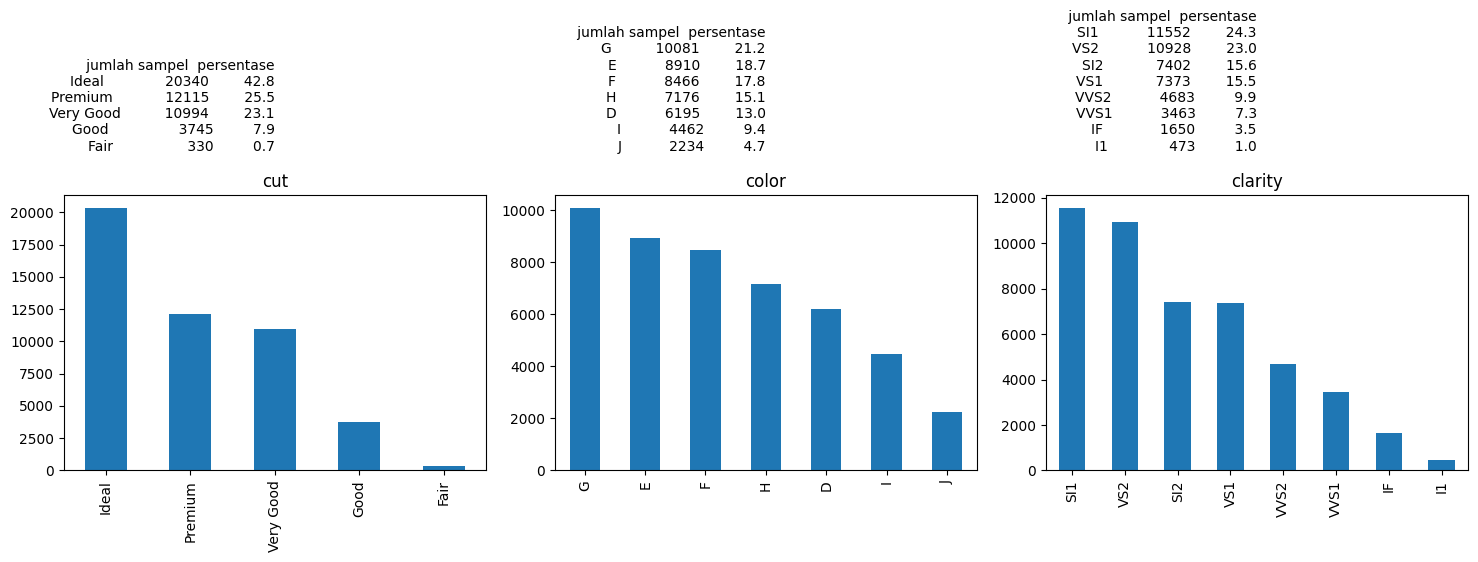

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Loop through each categorical feature
for idx, feature in enumerate(categorical_cols):    
    # Calculate count and percentage for each category
    count = diamonds[feature].value_counts()
    percent = 100 * diamonds[feature].value_counts(normalize=True)
    
    # Create DataFrame for count and percentage
    df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    
    # Plot the bar chart
    count.plot(kind='bar', ax=axes[idx], title=feature)
    
    # Display the DataFrame above each plot using fig.text
    # Adjust the position and size of the text
    table_text = df.to_string(index=True)
    axes[idx].text(0.5, 1.15, table_text, ha='right', va='bottom', transform=axes[idx].transAxes, fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


1. `Cut`     : Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium.

2. `color` : Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik di atas, dapat kita simpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, E.

3. `clarity` : Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling   baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.
    - 'IF' - Internally Flawless 
    - 'VVS2' - Very Very Slight Inclusions 
    - 'VVS1' - Very Very Slight Inclusions 
    - 'VS1' - Very Slight Inclusions
    - 'VS2' - Very Slight Inclusions
    - 'SI2' - Slight Inclusions
    - 'SI1' - Slight Inclusions
    - 'I1' - Imperfect
    Dari grafik kita bisa menyimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.


#### Numerical Feature

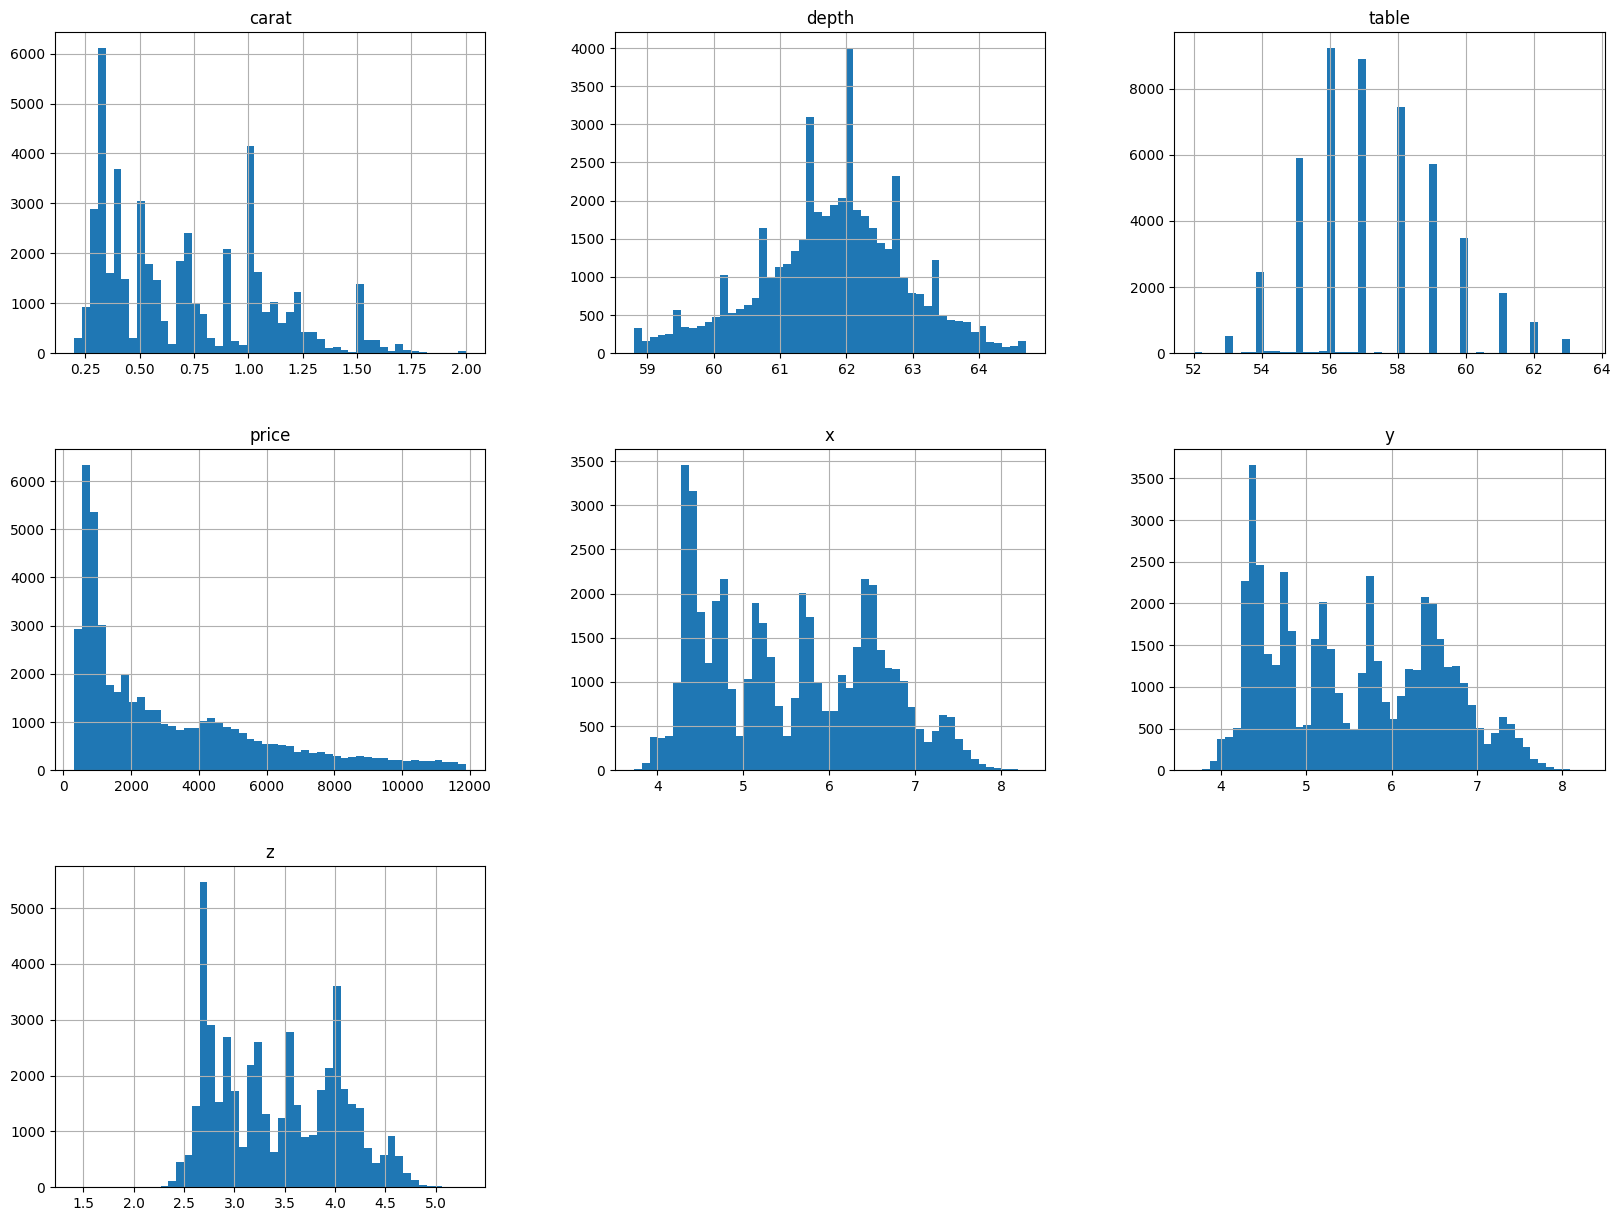

In [77]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu y).
- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar `$11800`.
- Setengah harga berlian bernilai di bawah `$2500`.
- Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

### Multivariate Analysis

#### Categorical Features

In [78]:
categorical_cols

['cut', 'color', 'clarity']

C:\Users\Jals\AppData\Local\Temp\ipykernel_21856\2808357942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
C:\Users\Jals\AppData\Local\Temp\ipykernel_21856\2808357942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
C:\Users\Jals\AppData\Local\Temp\ipykernel_21856\2808357942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="pri

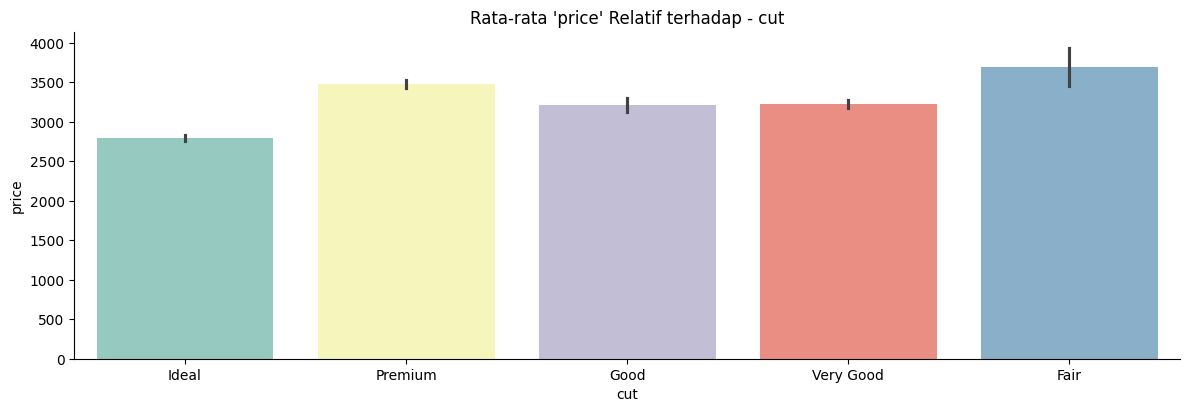

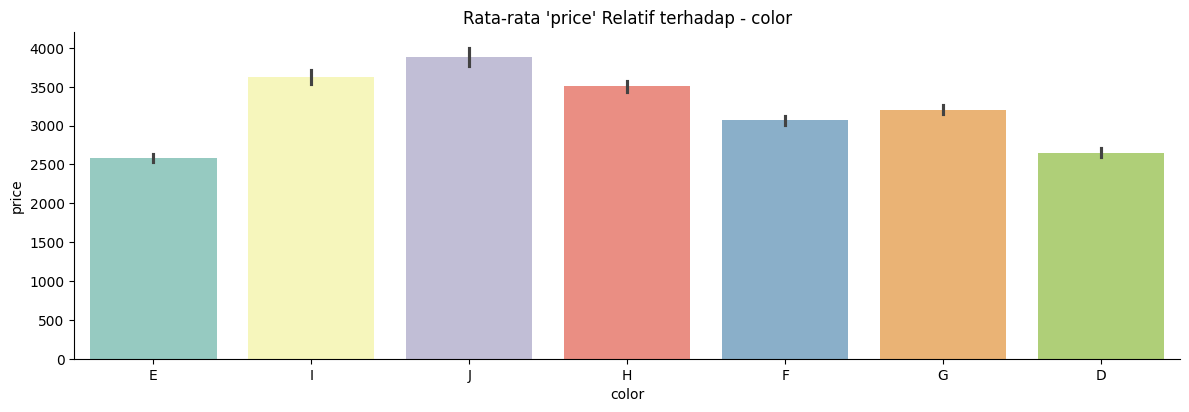

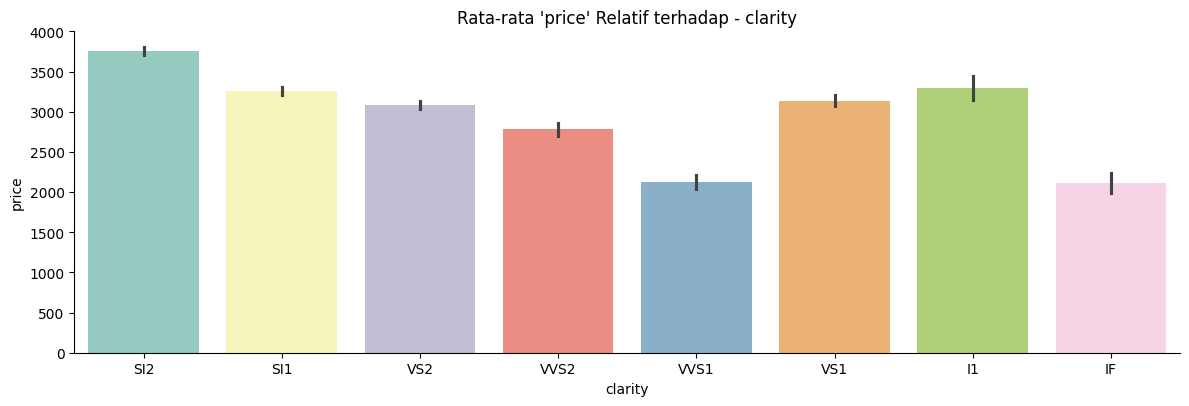

In [80]:
for col in categorical_cols:
    sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

- Pada fitur `cut`, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada fitur `color`, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
- Pada fitur `clarity`, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.
- Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.

#### Numerical Features

In [91]:
# Suppress user warnings
warnings.filterwarnings("ignore", category=UserWarning)

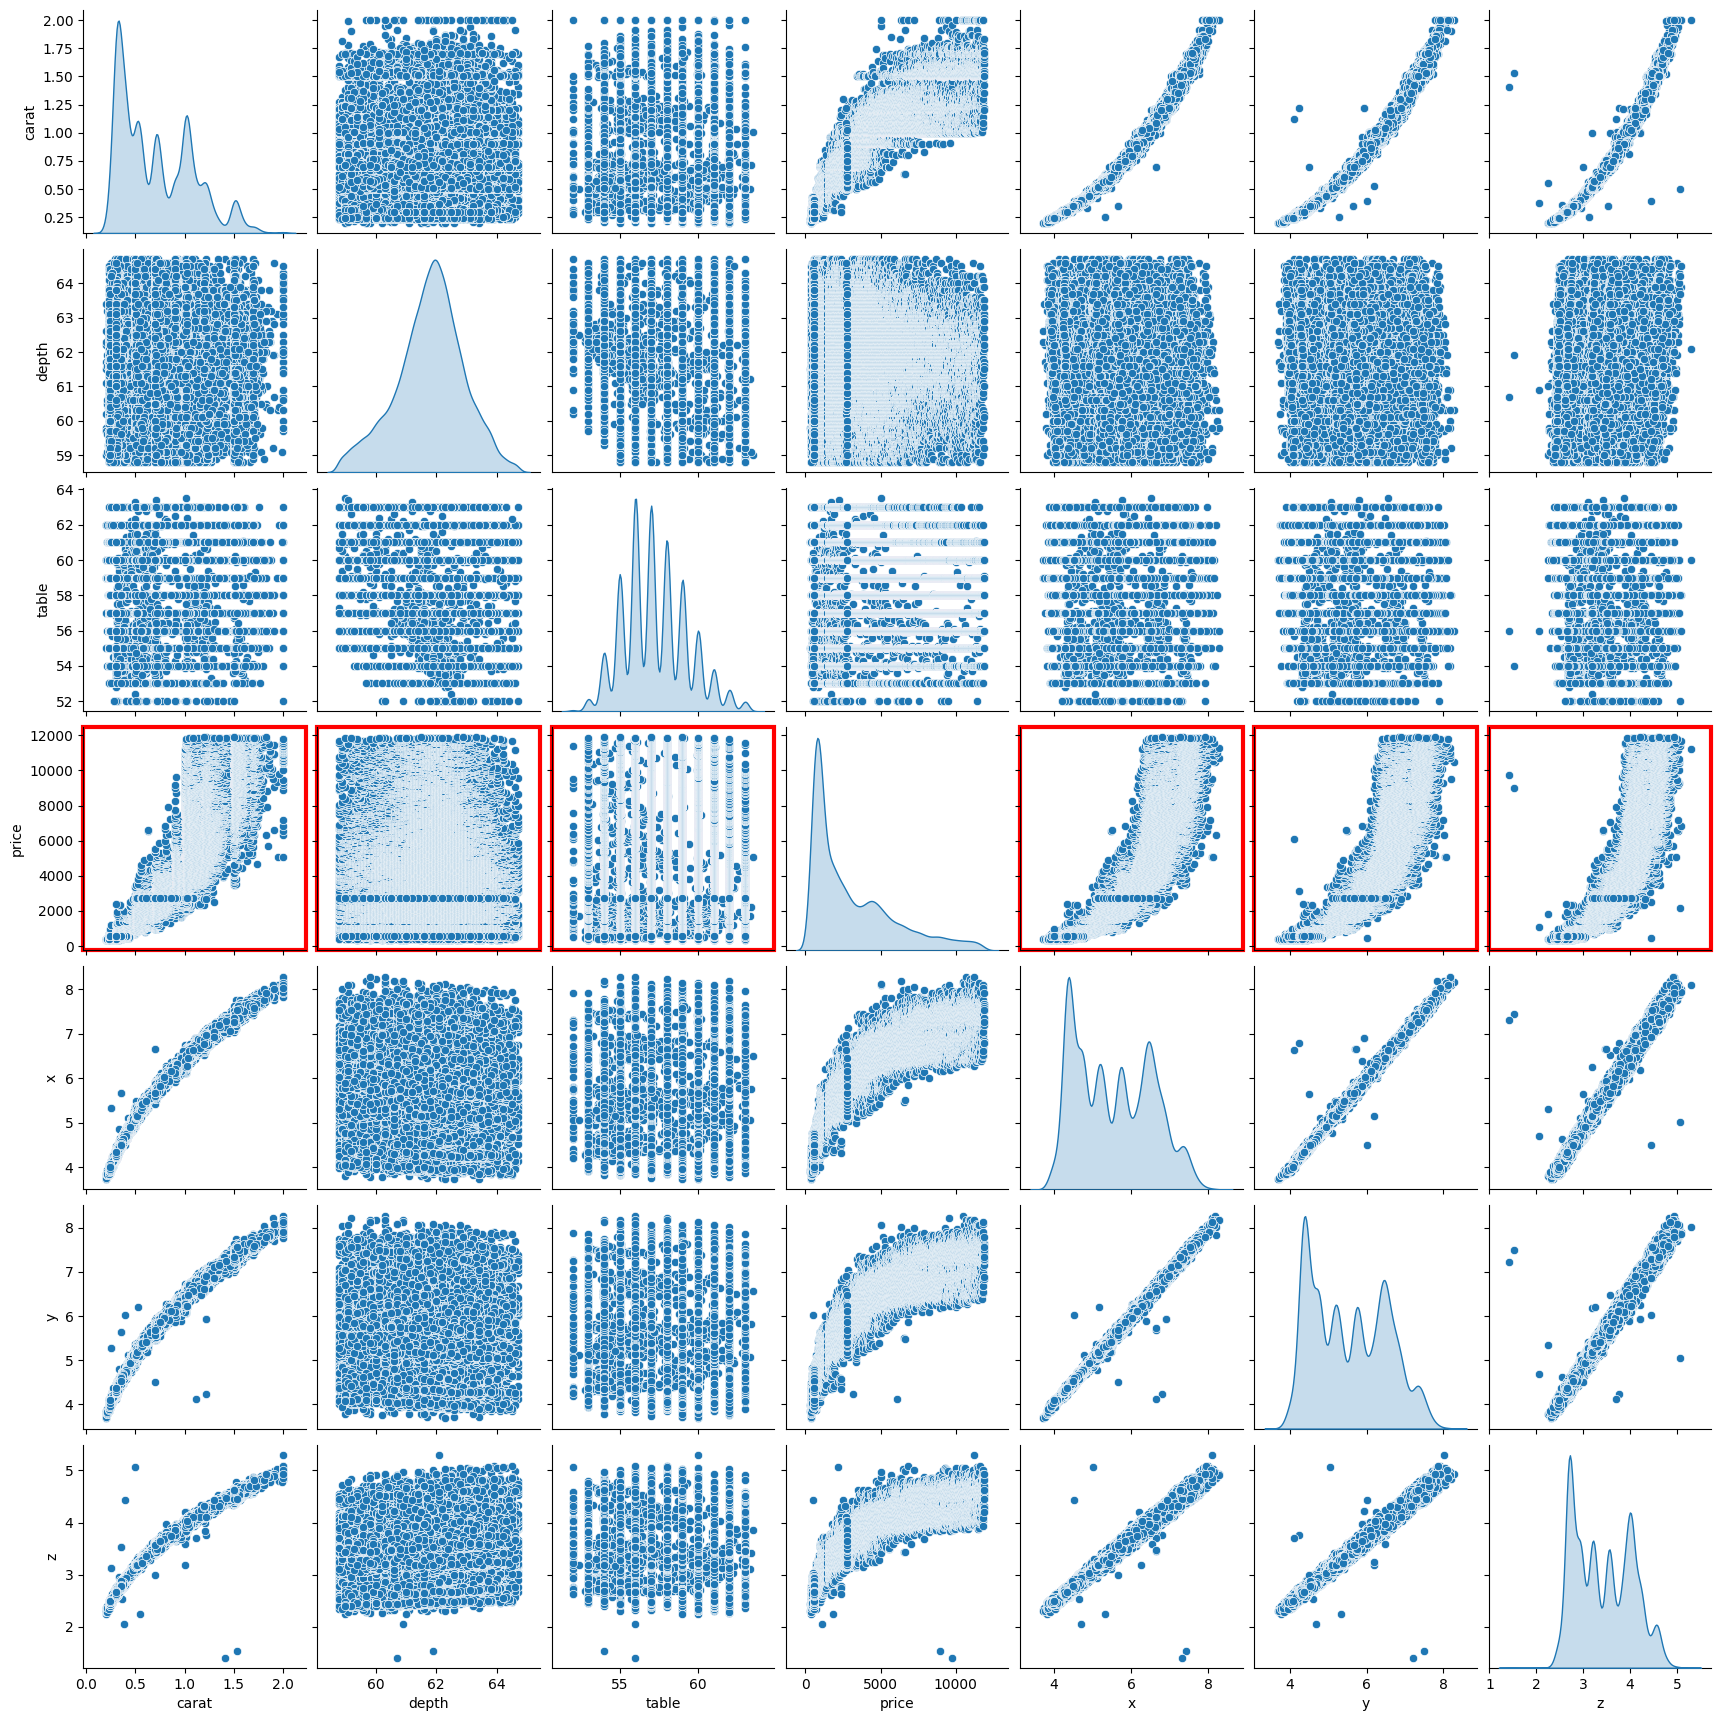

In [92]:
# Create a pair plot for the numerical columns, highlighting "price"
pairplot = sns.pairplot(diamonds, diag_kind='kde', palette='coral')

# Highlight the "price" plot
for ax in pairplot.axes.flat:
    if ax.get_ylabel() == 'price':
        ax.patch.set_edgecolor('red')
        ax.patch.set_linewidth(3)

plt.show()

Pada pola sebaran data grafik pairplot sebelumnya, terlihat `carat`, `x`, `y`, dan `z` memiliki korelasi yang tinggi dengan fitur `price`. Sedangkan kedua fitur lainnya yaitu `depth` dan `table` terlihat memiliki korelasi yang lemah karena sebarannya tidak membentuk pola.

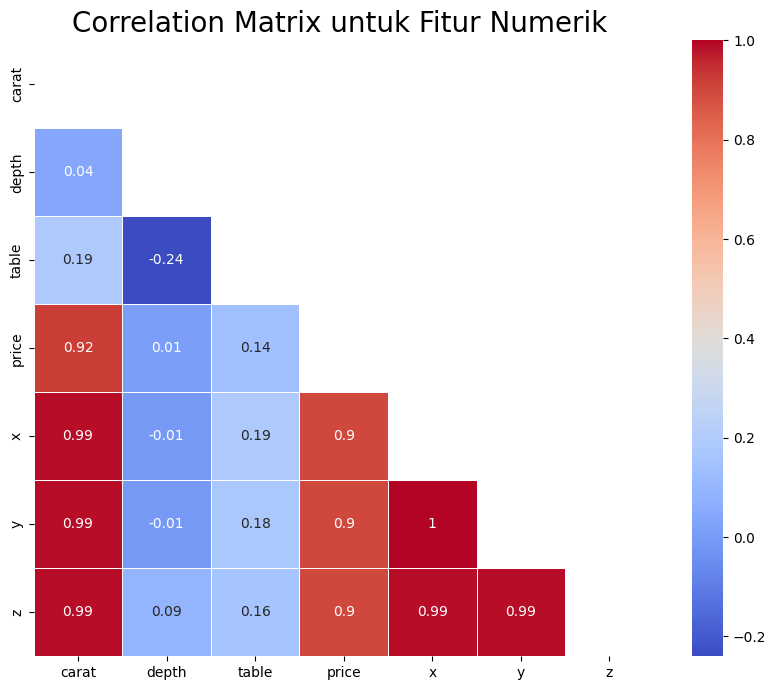

In [98]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds[num_cols].corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

Berdasarkan correlation matrix fitur `carat`, `x`, `y`, dan `z` memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target `price`. Artinya, fitur `price` berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur `depth` memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut dapat di-drop.

In [99]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


## Data Preparation

#### Encoding Fitur Kategori

In [101]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### Reduksi Dimensi dengan PCA

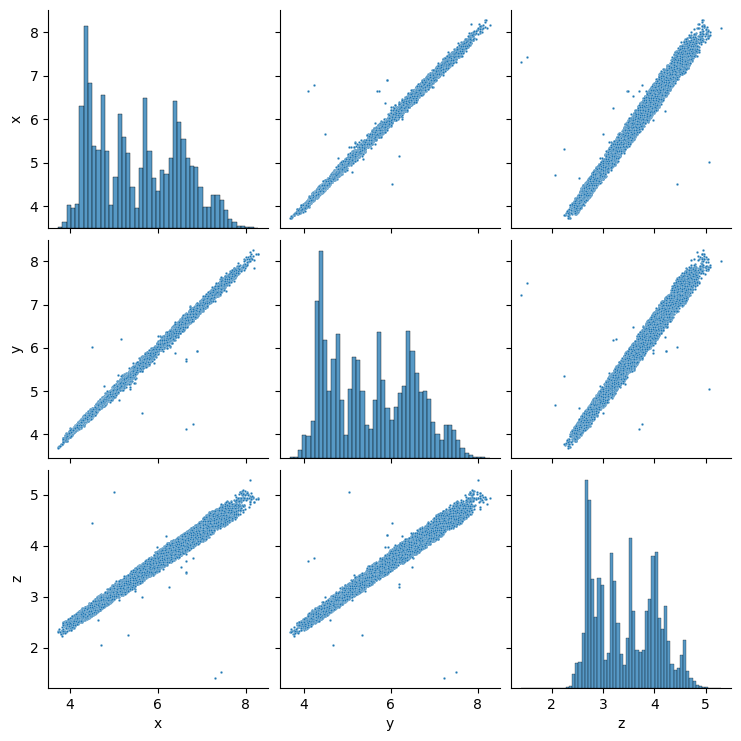

In [102]:
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [104]:
# pca = PCA(n_components=3, random_state=123)
# pca.fit(diamonds[['x','y','z']])
# princ_comp = pca.transform(diamonds[['x','y','z']])

In [105]:
# pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [106]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

In [107]:
diamonds.head()

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982


### Train-Test Split

In [112]:
X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [113]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 38019
Total # of sample in test dataset: 9505


### Standarization

In [116]:
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_features

['carat', 'table', 'dimension']

In [118]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
14410,0.967588,-0.125794,1.038486
44449,-0.432780,-0.621366,-0.252916
21776,2.664189,0.369778,2.100278
29697,-1.079104,-1.612510,-1.211806
29419,-0.782873,-0.125794,-0.758643


In [119]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,38019.0000,38019.0000,38019.0000
mean,0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3753,-2.6037,-1.8708
25%,-0.8906,-0.6214,-0.9287
50%,-0.2712,-0.1258,-0.0979
75%,0.8060,0.8653,0.8822
max,3.4721,3.0954,2.6966


## Model Development

In [120]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### KNN

In [124]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

In [127]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

### Adaptive Boost

In [128]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

In [129]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [130]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,216.325133,257.253066
RF,50.442529,125.769197
Boosting,912.529915,899.065105


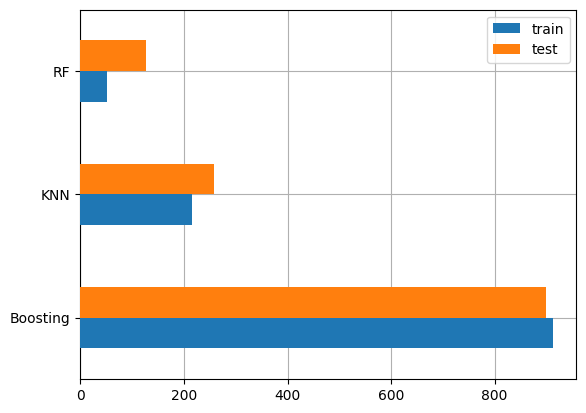

In [131]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 800( telah dibagi nilai 1e3. )). Sehingga model RF yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga diamonds.

In [132]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,922.5,890.0,787.3


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.